<a href="https://colab.research.google.com/github/PomazkinG/Particle/blob/master/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take-home lab session by Pomazkin Grigorii

Student id: 66904

Input data: images of handwritten digits rotated and not rotated

Expected output: 2 classification results - digit (e.g. 1,2,3) and rotated or not (0 or 1)

In [2]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.image import rot90
import pandas as pd
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from matplotlib import pyplot as plt

Using TensorFlow backend.


Download and prepare MNIST dataset

In [3]:
def batch_rotate(images, indices):
    images_with_channel = images[:, :, :, numpy.newaxis]
    images_with_channel[indices] = rot90(images_with_channel[indices])
    return images_with_channel / 255.

def prepare_mnist():
    rng = numpy.random.RandomState(0)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    rotate_train = rng.choice(2, size=x_train.shape[0]).astype(numpy.bool)
    rotate_test = rng.choice(2, size=x_test.shape[0]).astype(numpy.bool)
    x_train = batch_rotate(x_train, rotate_train)
    x_test = batch_rotate(x_test, rotate_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    rotate_train = rotate_train.reshape((-1, 1))
    rotate_test = rotate_test.reshape((-1, 1))
    return x_train, x_test, y_train, y_test, rotate_train, rotate_test
  
x_train, x_test, y_train, y_test, y_rot_train, y_rot_test = prepare_mnist()
y_rot_train = y_rot_train*1
y_rot_test = y_rot_test*1
print(x_train.shape, y_train.shape, y_rot_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10) (60000, 1)


List of hyperparameters

In [0]:
#Input shape 28x28 (image size) + channel = 1
input_shape = [x_train.shape[1],x_train.shape[2],x_train.shape[3]]

#Batch size giving computer power = 128
batch_size = 128

#To save time number of epochs = 10
num_epoch = 10

#Optimizer ADAM
opt = keras.optimizers.Adam() 

#Loss function for digit output = categorical_crossentropy (multiclassification problem) and 
#for rotation output loss function = binary_crossentropy (binary classification problem)
losses = {"digit_output": "categorical_crossentropy", "rotation_output": "binary_crossentropy"}

**Model architecture**

Choose the number of convolution-pooling pairs

In [8]:
NN = 8 #number of neural nets
model = [0] * NN

for j in range(NN):
  #input layer
  input_layer = Input(shape=input_shape) 

  #1st convolution-pooling pair
  Conv_1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(input_layer)
  Max_Pooling_1 = MaxPooling2D()(Conv_1)

  #2nd convolution-pooling pair
  Conv_2 = Conv2D(64, (3, 3), activation='relu')(Max_Pooling_1)
  Max_Pooling_2 = MaxPooling2D()(Conv_2)

  #Flattening
  Flat = Flatten()(Max_Pooling_2)

  #Dense layer
  if j>0:
    Dense_1 = Dense(2**(j+4), activation='relu')(Flat)

  #Output layers

  #1. digit recognition
  digit_output = Dense(y_train.shape[1], activation='softmax', name = 'digit_output')(Dense_1)

  #2. rotation recognition
  rotation_output = Dense(y_rot_train.shape[1], activation='sigmoid', name = 'rotation_output')(Dense_1)

  #model compilation
  model[j] = Model(inputs=input_layer, outputs=[digit_output, rotation_output])
  model[j].compile(loss=losses,optimizer=opt,metrics=['accuracy']) #accuracy for classification problem




NameError: ignored

In [34]:
model_log[j] = model.fit(x_train,
	{"digit_output": y_train, "rotation_output": y_rot_train},
	validation_data=(x_test,
		{"digit_output": y_test, "rotation_output": y_rot_test}),
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2906 - digit_output_loss: 0.2506 - rotation_output_loss: 0.0399 - digit_output_accuracy: 0.9224 - rotation_output_accuracy: 0.9860 - val_loss: 0.1002 - val_digit_output_loss: 0.0866 - val_rotation_output_loss: 0.0126 - val_digit_output_accuracy: 0.9717 - val_rotation_output_accuracy: 0.9956
Epoch 2/3
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0761 - digit_output_loss: 0.0658 - rotation_output_loss: 0.0102 - digit_output_accuracy: 0.9798 - rotation_output_accuracy: 0.9966 - val_loss: 0.0725 - val_digit_output_loss: 0.0605 - val_rotation_output_loss: 0.0112 - val_digit_output_accuracy: 0.9802 - val_rotation_output_accuracy: 0.9963
Epoch 3/3
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0450 - digit_output_loss: 0.0386 - rotation_output_loss: 0.0064 - digit_output_accuracy: 0.9878 - rotation_output_accuracy:

In [35]:
model_log.history

{'digit_output_accuracy': [0.9223833, 0.9798, 0.9878333],
 'digit_output_loss': [0.25061244, 0.06584319, 0.038621265],
 'loss': [0.29059799047311147, 0.07606201435625554, 0.04495061506430308],
 'rotation_output_accuracy': [0.9860333, 0.99656665, 0.9979],
 'rotation_output_loss': [0.039895598, 0.010196369, 0.0063585187],
 'val_digit_output_accuracy': [0.9717000126838684,
  0.9801999926567078,
  0.9822999835014343],
 'val_digit_output_loss': [0.08658172190189362,
  0.06045356020331383,
  0.05241880565881729],
 'val_loss': [0.10024478524215519, 0.07248186814128421, 0.06547014206629247],
 'val_rotation_output_accuracy': [0.9955999851226807,
  0.9962999820709229,
  0.9962999820709229],
 'val_rotation_output_loss': [0.012584253214299679,
  0.01123055536299944,
  0.012334040366113186]}

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.07858740667637083
Test accuracy: 0.9824000000953674


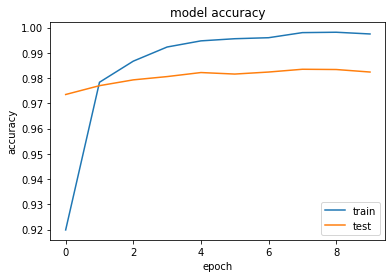

In [0]:
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)